In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav
from scipy.signal import butter, filtfilt, freqz
from scipy.io.wavfile import write

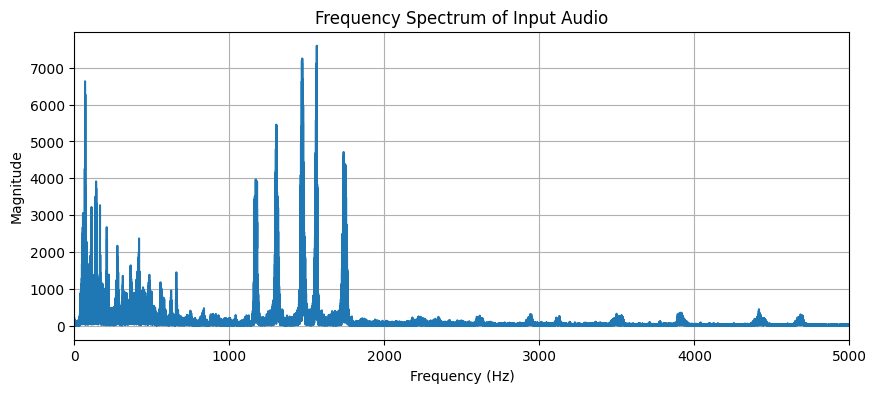

In [121]:
rate, audio = wav.read("song_with_2piccolo.wav")
audio = audio / np.max(np.abs(audio))
if audio.ndim > 1:
    audio = audio[:, 0]

# Compute FFT
N = len(audio)
frequencies = np.fft.rfftfreq(N, 1 / rate)
fft_spectrum = np.abs(np.fft.rfft(audio))

# Plot
plt.figure(figsize=(10, 4))
plt.plot(frequencies, fft_spectrum)
plt.title("Frequency Spectrum of Input Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim([0, 5000])
plt.grid()
plt.show()


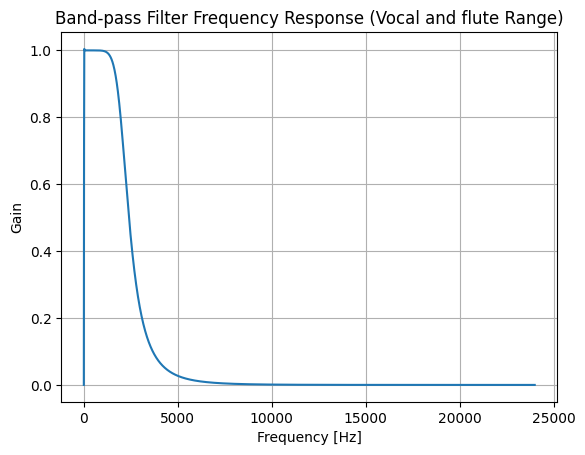

In [122]:
# vocals and flute range
lowcut = 10.0
highcut = 2100.0
fs = rate
order = 4

# Band-pass filter design
b, a = butter(order, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')

# Frequency response
w, h = freqz(b, a, worN=2000)
plt.plot((fs * 0.5) * w / np.pi, abs(h))
plt.title('Band-pass Filter Frequency Response (Vocal and flute Range)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.show()


In [123]:
without_beats_audio = filtfilt(b, a, audio)

In [124]:
write("beats_removal.wav", fs, (without_beats_audio * 32767).astype(np.int16))

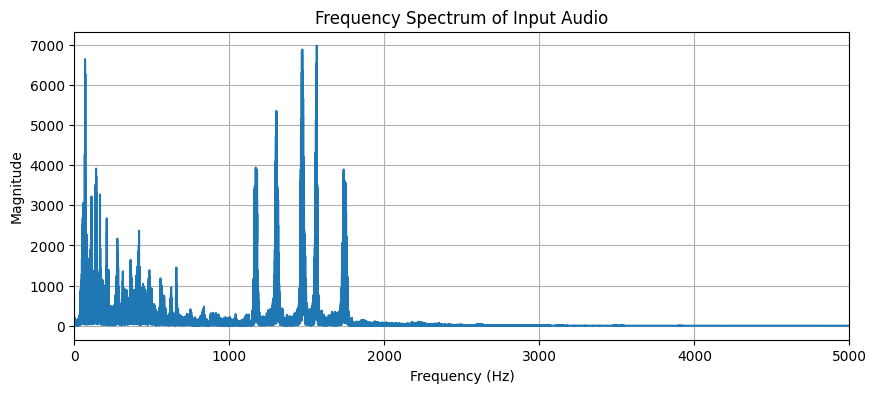

In [125]:
N_without_beats = len(without_beats_audio)

frequencies_without_beats = np.fft.rfftfreq(N_without_beats, 1 / rate)
fft_spectrum_without_beats = np.abs(np.fft.rfft(without_beats_audio))

plt.figure(figsize=(10, 4))
plt.plot(frequencies_without_beats, fft_spectrum_without_beats)
plt.title("Frequency Spectrum of Input Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim([0, 5000])
plt.grid()
plt.show()

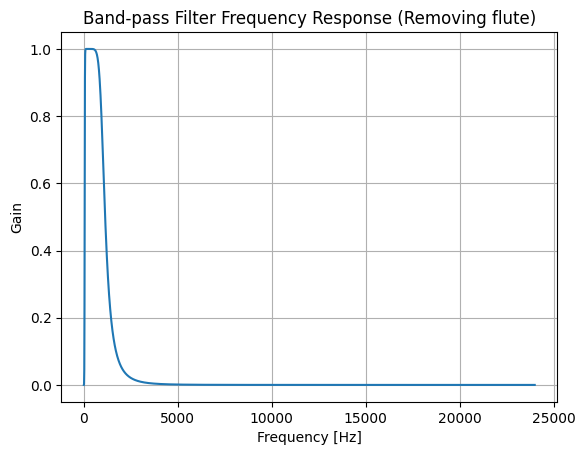

In [126]:
# Vocals only range
lowcut = 50.0
highcut = 1000.0
fs = rate
order = 4

# Band-pass filter design
b, a = butter(order, [lowcut / (0.5 * fs), highcut / (0.5 * fs)], btype='band')

# Frequency response
w, h = freqz(b, a, worN=2000)
plt.plot((fs * 0.5) * w / np.pi, abs(h))
plt.title('Band-pass Filter Frequency Response (Removing flute)')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Gain')
plt.grid()
plt.show()

In [127]:
vocals_only = filtfilt(b, a, audio)
vocals_only = filtfilt(b, a , vocals_only) # stacking to cut frequencies which remained due to smooth curve

In [128]:
write("vocals_only.wav", fs, (vocals_only * 32767).astype(np.int16))

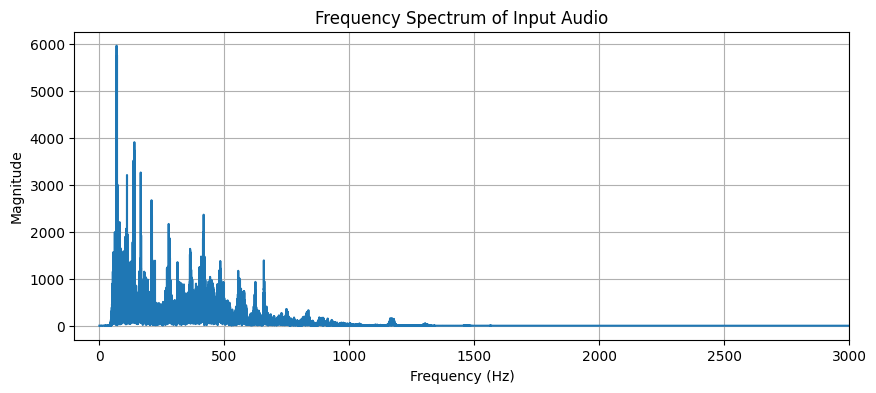

In [129]:
N_vocals_only = len(vocals_only)

frequencies_vocals_only = np.fft.rfftfreq(N_vocals_only, 1 / rate)
fft_spectrum_vocals_only = np.abs(np.fft.rfft(vocals_only))

plt.figure(figsize=(10, 4))
plt.plot(frequencies_vocals_only, fft_spectrum_vocals_only)
plt.title("Frequency Spectrum of Input Audio")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.xlim([-100, 3000])
plt.grid()
plt.show()